In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

**Read Data**

In [8]:
Data=pd.read_csv("/kaggle/input/walmart-dataset-retail/Walmart_Store_sales.csv")
Data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [20]:
Data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [21]:
Data.shape

(6435, 8)

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
Data.sort_values("Weekly_Sales",ascending=False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795
...,...,...,...,...,...,...,...,...
4671,33,02-12-2011,220060.35,0,59.12,3.701,129.845967,8.010
4623,33,31-12-2010,219804.85,1,52.91,3.148,127.087677,9.265
4675,33,30-12-2011,215359.21,1,51.60,3.428,130.071032,8.010
4614,33,29-10-2010,213538.32,0,71.34,3.130,126.436419,9.265


In [18]:
Data.sort_values("Fuel_Price",ascending=False).head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4716,33,12-10-2012,291781.15,0,79.64,4.468,131.108333,6.895
1427,10,12-10-2012,1713889.11,0,76.03,4.468,131.108333,6.943
5431,38,12-10-2012,437320.66,0,71.74,4.468,131.108333,10.199
6003,42,12-10-2012,612379.90,0,76.03,4.468,131.108333,6.943
1713,12,12-10-2012,934917.47,0,71.74,4.468,131.108333,10.199


In [22]:
Data.size

51480

In [24]:
Data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


**Check Null Values**

In [77]:
Data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**Visualization**

Text(0.5, 1.0, 'Sctter plot of Weekly Sales vs Temperature')

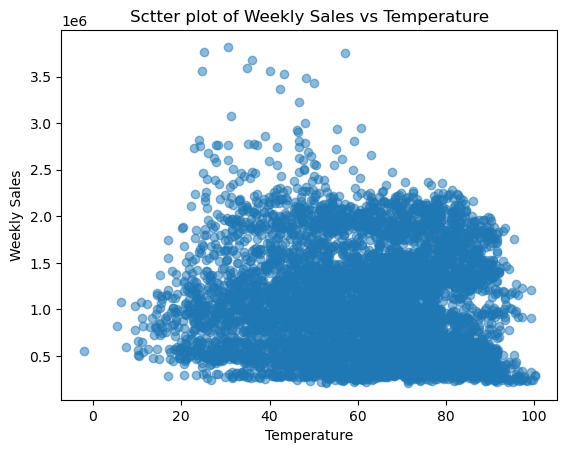

In [24]:
plt.scatter(Data["Temperature"],Data["Weekly_Sales"], alpha = 0.5)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Sctter plot of Weekly Sales vs Temperature")

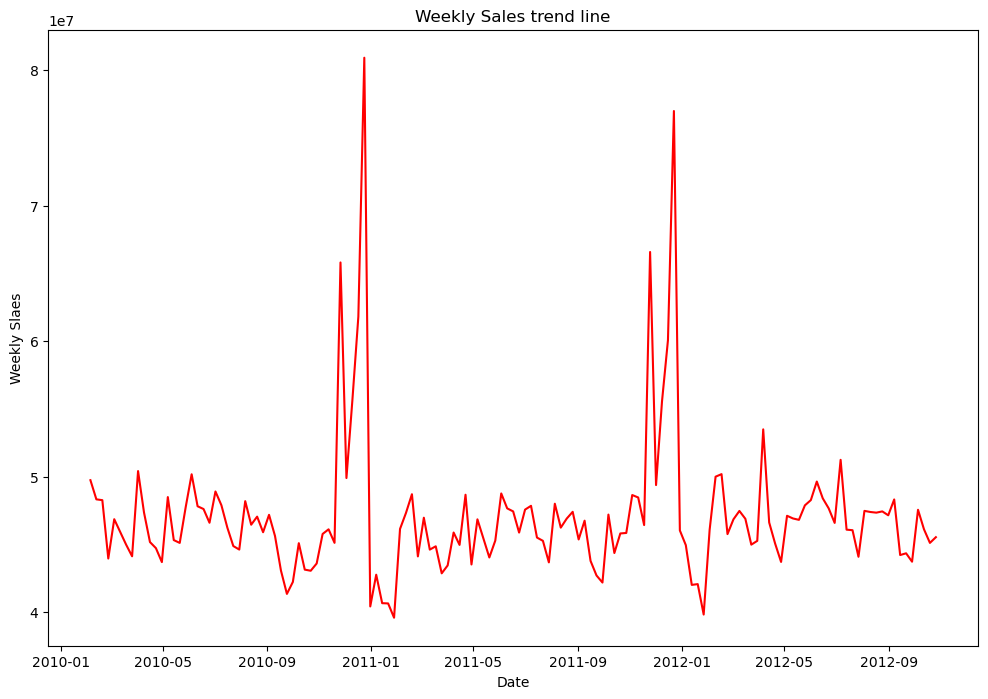

In [26]:
# Weekly Sales trend line

#changing the date data type 
Data["Date"] = pd.to_datetime(Data["Date"], format = '%d-%m-%Y')

# aggeregate all the weekly sales
WeeklySales = Data.groupby(["Date"])["Weekly_Sales"].sum().reset_index()

plt.figure(figsize=(12,8))

plt.plot(WeeklySales["Date"],WeeklySales["Weekly_Sales"],color="red")
plt.xlabel("Date")
plt.ylabel("Weekly Slaes")
plt.title("Weekly Sales trend line")
plt.show()

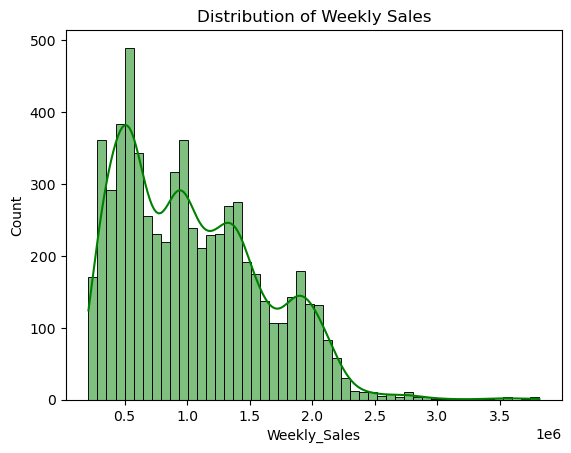

In [29]:
# Distribution of wekly sales
sns.histplot(Data['Weekly_Sales'], bins = 50,color = "green", edgecolor = "black", kde = True)
plt.title("Distribution of Weekly Sales")
plt.show()

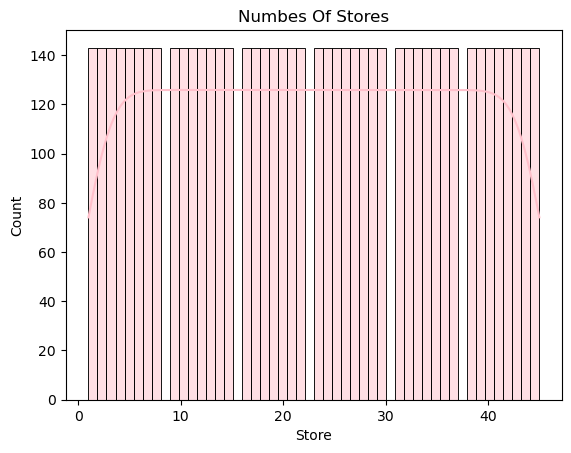

In [34]:
# Distribution of wekly sales
sns.histplot(Data['Store'], bins = 50,color = "pink", edgecolor = "black", kde = True)
plt.title("Numbes Of Stores")
plt.show()

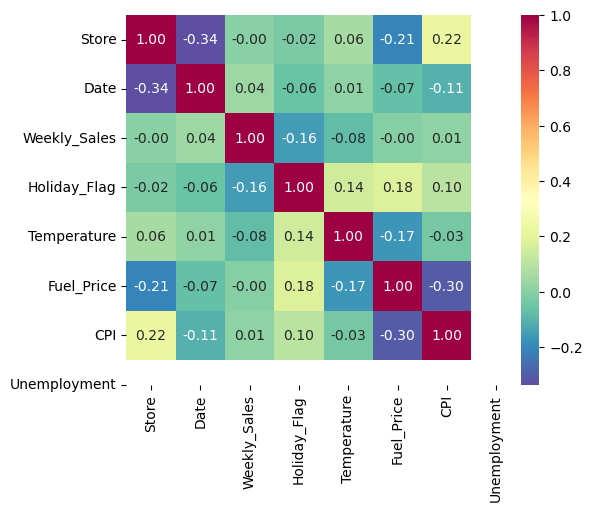

In [36]:
corrmat = Data.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=Data.columns, 
                 xticklabels=Data.columns, 
                 cmap="Spectral_r")
plt.show()

<Axes: xlabel='Fuel_Price', ylabel='Density'>

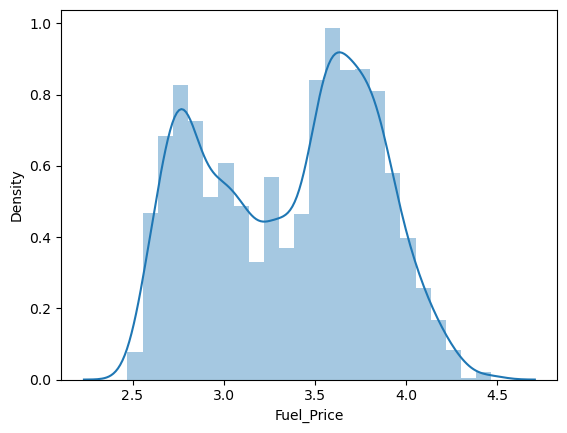

In [33]:
sns.distplot(Data['Fuel_Price'])

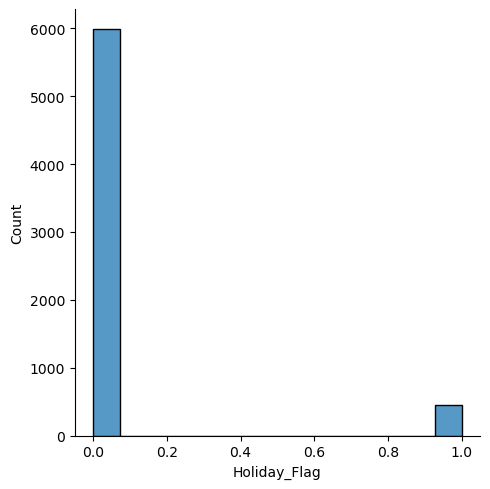

In [37]:
sns.displot(Data['Holiday_Flag'])

In [34]:
Data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

<Axes: xlabel='Unemployment', ylabel='Density'>

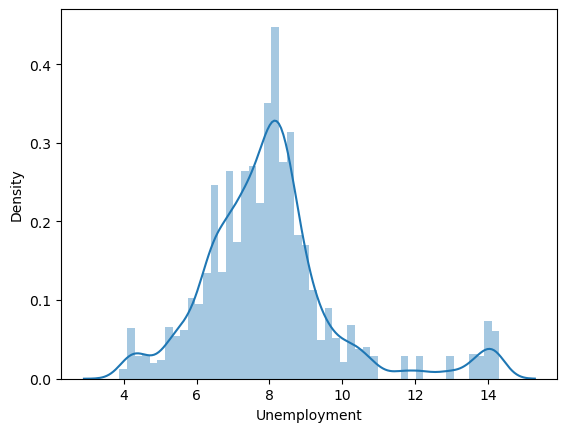

In [58]:

    sns.distplot(Data['Unemployment'])
        

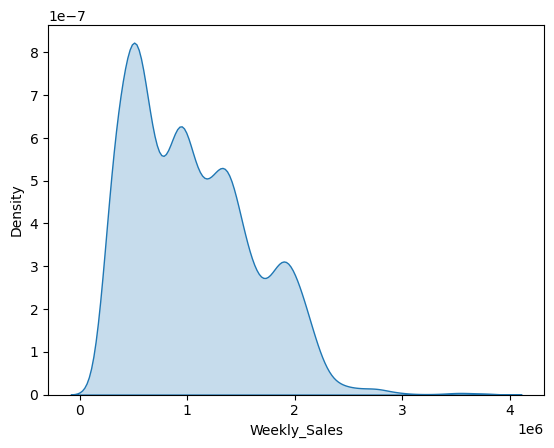

In [72]:
sns.kdeplot(Data["Weekly_Sales"],shade=True,);

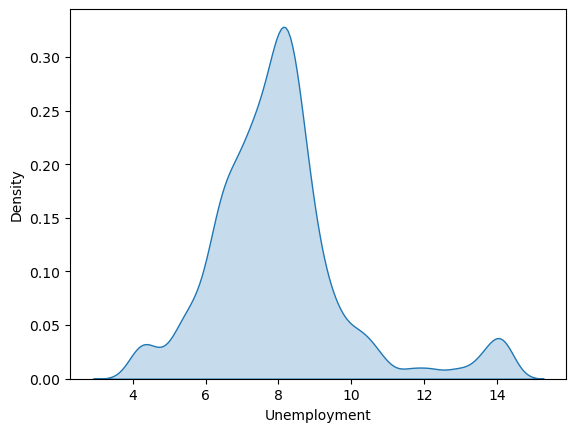

In [74]:
sns.kdeplot(Data["Unemployment"],shade=True);